In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [4]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=100, verbose=0)
model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None
10/10 [==============================] - 0s 461us/step - loss: 0.0194 - accuracy: 0.9933


[0.01940843090415001, 0.9933333396911621]

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.996
The Accuracy score on the Test set is:	0.993


/home/nonroot/.conda/envs/ztdl/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


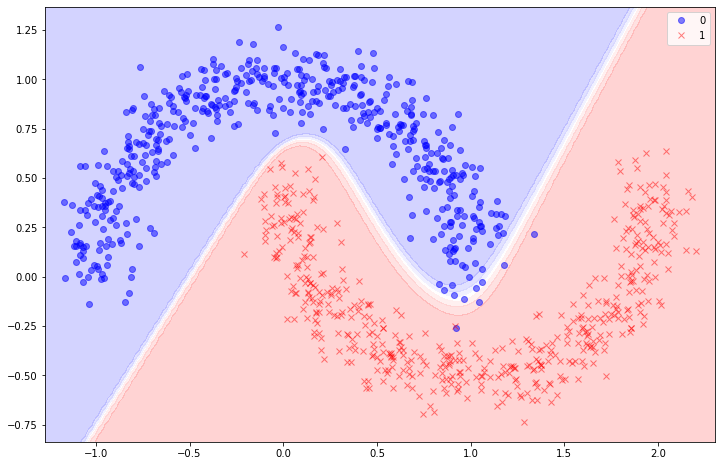

In [6]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2);
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

plot_decision_boundary(model, X, y);

#### Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training. Hoeveel lagen heeft dit netwerk?
![schets_5.2](images/schets_5.2.png)
Dit netwerk bestaat uit 4 lagen. Dat is ook te zien met de `model.summary()` functie.

#### Welke optimizer wordt hier toegepast? Leg in eigen woorden uit wat i.h.a. de functie is van een optimizer.

Er wordt hier gebruik gemaakt van de Adam optimizer.
Optimizers bevatten algoritmes die gebruikt worden om de attributen van het neurale netwerkt zoals de weight en de learning rate aan te passen. Deze attributen worden op zo'n manier aangepast dat dit het meest accurate model oplevert.

#### Wat is je conclusie op basis van accuracy scores van de trainingset en de testset? M.a.w. hoe goed is classificatie?

De classificatie is erg goed als er wordt gekeken naar de accuracy. De accuracy komt dicht in de buurt van de 1.0

#### Is hier sprake van overfitting? Licht je antwoord toe.
Een model dat last heeft van overfitting reageert teveel op ruis. Het model past dan beter bij de trainingsdata en slechter bij de testdata.

Gezien de accuracy van de testset lijkt dit model geen last te hebben van overfitting.